#**Short description of your Veracity Factor - CLICKBAIT**

**Business Objective:** Check if the headline is a clickbait.

The term *“clickbait”* refers to an article headline written with the sole purpose of using *sensationalist* language to lure in a viewer to click through to a certain webpage. The webpage then generates ad revenue on the user’s clicks or monetizes the user’s activity data. The article itself is not written with journalistic integrity, research or really striving for any deeper meaning — it is simply a vehicle to monetize user clicks and data.

**Dataset** - https://www.kaggle.com/amananandrai/clickbait-dataset


#**Academic papers used**

- https://arxiv.org/pdf/2003.12961.pdf

- https://arxiv.org/pdf/1710.01977.pdf
- https://ieeexplore.ieee.org/document/7877426

### Categorizing headlines from news websites into Clickbait and Non-Clickbait:
#### Basis for categorization:

**Clickbait sources:** Buzzfeed, Upworthy, ViralNova, BoredPanda, Thatscoop, Viralstories, Examiner, TheOdyssey

**Non-clickbait sources:** NY Times, The Washington Post, The Guardian, Bloomberg, The Hindu, WikiNews, Reuters

**3-factors recognized:**
- Question mark
- Exclamation	mark
- Starts with num

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


from wordcloud import WordCloud, STOPWORDS

import string
from string import punctuation
from matplotlib import style

In [ ]:
#reading in datasets
clickbait_df=pd.read_csv('/content/drive/MyDrive/Team BingeCoders/Data/ClickBaitData/clickbait_final.csv',index_col=0)
nytimes_df=pd.read_csv('/content/drive/MyDrive/Team BingeCoders/Data/ClickBaitData/nytimes_data_final.csv',index_col=0)
guardian_df=pd.read_csv('/content/drive/MyDrive/Team BingeCoders/Data/ClickBaitData/guardian_headlines.csv',index_col=0)
twp_df=pd.read_csv('/content/drive/MyDrive/Team BingeCoders/Data/ClickBaitData/TWP_scraped.csv',index_col=0)
reuters_df=pd.read_csv('/content/drive/MyDrive/Team BingeCoders/Data/ClickBaitData/reuters_100.csv',index_col=0)
bloomberg_df=pd.read_csv('/content/drive/MyDrive/Team BingeCoders/Data/ClickBaitData/bloomberg_100.csv',index_col=0)

In [ ]:
#labeling class to 1 for all clickbait headlines
clickbait_df['class']=1
clickbait_df.shape

(11116, 3)

In [ ]:
#labeling 'class' to 0 for non clickbait headlines
nytimes_df['class']=0
nytimes_df.shape

(5299, 3)

In [ ]:
guardian_df['class']=0
guardian_df.shape

(3400, 3)

In [ ]:
twp_df.rename(columns={'title':"text",'published':'date'},inplace=True)
twp_df['class']=0

In [ ]:
reuters_df['class']=0
bloomberg_df['class']=0
all_headlines_df=pd.concat([clickbait_df,nytimes_df,guardian_df,twp_df,reuters_df,bloomberg_df])
all_headlines_df.shape

(20174, 3)

In [ ]:
all_headlines_df.drop(columns='date',inplace=True)
dataset2=pd.read_csv('/content/drive/MyDrive/Team BingeCoders/Data/ClickBaitData/2007_2016_headline_data.csv')
dataset2.rename(columns={'headline':'text','clickbait':'class'},inplace=True)
dataset2

,text,class
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1
...,...,...
31995,"To Make Female Hearts Flutter in Iraq, Throw a...",0
31996,"British Liberal Democrat Patsy Calton, 56, die...",0
31997,Drone smartphone app to help heart attack vict...,0
31998,"Netanyahu Urges Pope Benedict, in Israel, to D...",0


In [ ]:
df = pd.concat([all_headlines_df,dataset2])
df.shape

(52174, 2)

In [ ]:
df['class'].value_counts()

1    27115
0    25059
Name: class, dtype: int64

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Team BingeCoders/Data/ClickBaitData/total_headlines.csv')

In [ ]:
#make text lowercase
df['text']=df['text'].apply(lambda x: x.lower())

In [ ]:
import re
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    #text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('  ', ' ', text)
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text)
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('“','',text)
    text = re.sub('”','',text)
    text = re.sub('’','',text)
    text = re.sub('–','',text)
    text = re.sub('‘','',text)
    
    return text

In [ ]:
#function to find if string contains a question and if so, update new feature with a 1 for yes or 0 for no
question_words = ['who','what','where','why','when','whose','whom','would','will','how','which','should','could']

def contains_question(headline):
    if "?" in headline or headline.startswith(('who','what','where','why','when','whose','whom','would','will','how','which','should','could','did','do')):
        return 1
    else: 
        return 0

df['question_6']=df['text'].apply(contains_question)

In [ ]:
df.rename(columns={'question_6':'question'},inplace=True)

In [ ]:
df['question'].value_counts()

0    47388
1     4784
Name: question, dtype: int64

In [ ]:
#create function to find if headline contains '!' and create new feature with 1 for yes and 0 for no
def contains_exclamation(headline):
    if "!" in headline: 
        return 1
    else: 
        return 0
df['exclamation']=df['text'].apply(contains_exclamation)

In [ ]:
df.exclamation.value_counts()

0    51614
1      558
Name: exclamation, dtype: int64

In [ ]:
#clean headlines to remove puncuation and links
#create feature to count words of each (before removing stop words and numbers)
#create feature to count if headline starts with a digit or not

feature_engineering_clean = lambda x: clean_text_round1(x)
df.text = pd.DataFrame(df.text.apply(feature_engineering_clean))


#create function to find if headline starts with a digit and create new feature with 1 for yes and 0 for no
def starts_with_num(headline):
    if headline.startswith(('1','2','3','4','5','6','7','8','9')): 
        return 1
    else: 
        return 0

df['starts_with_num']=df['text'].apply(starts_with_num)

In [ ]:
df.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
#create feature that counts words in each headline
df['headline_words'] = df['text'].apply(lambda x: len(x.split()))

In [ ]:
df = df[df['headline_words'] != 0]
df

,text,class,question,exclamation,starts_with_num,headline_words
0,trey gowdy just humiliated adam schiff in fron...,1,0,0,0,10
1,60 netflix titles leaving in july 2020,1,0,0,1,7
2,learn how to make a green grape taste like a j...,1,0,1,0,22
3,the new july netflix titles are here and there...,1,0,0,0,13
4,the courts say sex discrimination laws protect...,1,0,0,0,19
...,...,...,...,...,...,...
52167,to make female hearts flutter in iraq throw a ...,0,0,0,0,10
52168,british liberal democrat patsy calton 56 dies ...,0,0,0,0,9
52169,drone smartphone app to help heart attack vict...,0,0,0,0,12
52170,netanyahu urges pope benedict in israel to den...,0,0,0,0,9


In [ ]:
df.to_csv('with_engineeredfeat_data.csv')

#EDA

In [ ]:
#cleaning data to remove stopwords & tokenize text for EDA

def tokenize(text):
  text = [word_tokenize(str(x)) for x in text]
  return text
df_debug = df.head(10).copy()
print(df_debug.text)
# df_debug.drop()
# df.text = tokenize(df.text)

# stopwords_list = stopwords.words('english')
# df.text = df['text'].apply(lambda x: [item for item in x if item not in stopwords_list])
# print(df.text)

0    trey gowdy just humiliated adam schiff in fron...
1               60 netflix titles leaving in july 2020
2    learn how to make a green grape taste like a j...
3    the new july netflix titles are here and there...
4    the courts say sex discrimination laws protect...
5    we need to talk about how 30 rock massively fa...
6    so theres a ton of love is blind cheating dram...
7    jonathan van ness from queer eye is a fashion ...
8    15 tiny details in cartoons that you didnt cat...
9    17 cats and dogs who didnt even try to hide th...
Name: text, dtype: object


In [ ]:
df_debug.text = tokenize(df_debug.text)

stopwords_list = stopwords.words('english')
df_debug.text = df_debug['text'].apply(lambda x: [item for item in x if item not in stopwords_list])
print(df_debug.text)

0    [trey, gowdy, humiliated, adam, schiff, front,...
1           [60, netflix, titles, leaving, july, 2020]
2    [learn, make, green, grape, taste, like, jolly...
3    [new, july, netflix, titles, theres, much, goo...
4    [courts, say, sex, discrimination, laws, prote...
5    [need, talk, 30, rock, massively, failed, lati...
6    [theres, ton, love, blind, cheating, drama, su...
7    [jonathan, van, ness, queer, eye, fashion, ico...
8    [15, tiny, details, cartoons, didnt, catch, ki...
9    [17, cats, dogs, didnt, even, try, hide, jealo...
Name: text, dtype: object


In [ ]:
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
#creating seperate dataframes for each class
df_cb=df_debug[df_debug['class']==1]

In [ ]:
df_noncb=df_debug[df_debug['class']==0]

In [ ]:
#creating a list of unique words for each class
cb_list=list(df_cb['text'])

total_vocab_cb = set()
for word in cb_list:
    total_vocab_cb.update(word)
len(total_vocab_cb)

86

In [ ]:
noncb_list=list(df_noncb['text'])

total_vocab_noncb = set()
for word in noncb_list:
    total_vocab_noncb.update(word)
len(total_vocab_noncb)

0

In [ ]:
flat_cb = [item for sublist in cb_list for item in sublist]
flat_noncb = [item for sublist in noncb_list for item in sublist]


cb_freq = FreqDist(flat_cb)
noncb_freq = FreqDist(flat_noncb)

In [ ]:
#top 20 clickbait words 
cb_freq.most_common(20)

[('netflix', 2),
 ('titles', 2),
 ('july', 2),
 ('theres', 2),
 ('didnt', 2),
 ('trey', 1),
 ('gowdy', 1),
 ('humiliated', 1),
 ('adam', 1),
 ('schiff', 1),
 ('front', 1),
 ('everyone', 1),
 ('60', 1),
 ('leaving', 1),
 ('2020', 1),
 ('learn', 1),
 ('make', 1),
 ('green', 1),
 ('grape', 1),
 ('taste', 1)]

In [ ]:
#top 20 non-clickbait words 
noncb_freq.most_common(20)

[]

In [ ]:
# create counts of clickbait and non-clickbait words and values
cb_bar_counts = [x[1] for x in cb_freq.most_common(20)]
cb_bar_words = [x[0] for x in cb_freq.most_common(20)]

noncb_bar_counts = [x[1] for x in noncb_freq.most_common(20)]
noncb_bar_words = [x[0] for x in noncb_freq.most_common(20)]

plt.style.use('seaborn-talk')

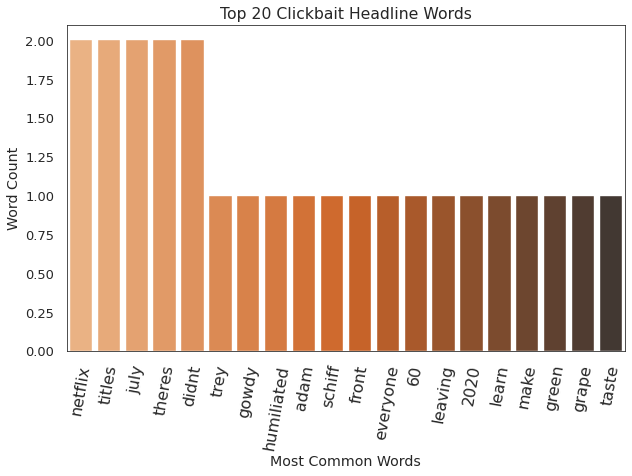

In [ ]:
#bar plot for top 15 most common clickbait words
word_freq_figure1 = plt.figure(figsize=(10,6))
sns.barplot(cb_bar_words, cb_bar_counts,palette='Oranges_d')
plt.xticks(fontsize=16)
plt.xticks(rotation=80)
plt.title('Top 20 Clickbait Headline Words')
plt.xlabel('Most Common Words')
plt.ylabel('Word Count')
sns.set_style('white')
plt.show()

In [ ]:
df.text = tokenize(df.text)

stopwords_list = stopwords.words('english')
df.text = df['text'].apply(lambda x: [item for item in x if item not in stopwords_list])
print(df_debug.text)

0    [trey, gowdy, humiliated, adam, schiff, front,...
1           [60, netflix, titles, leaving, july, 2020]
2    [learn, make, green, grape, taste, like, jolly...
3    [new, july, netflix, titles, theres, much, goo...
4    [courts, say, sex, discrimination, laws, prote...
5    [need, talk, 30, rock, massively, failed, lati...
6    [theres, ton, love, blind, cheating, drama, su...
7    [jonathan, van, ness, queer, eye, fashion, ico...
8    [15, tiny, details, cartoons, didnt, catch, ki...
9    [17, cats, dogs, didnt, even, try, hide, jealo...
Name: text, dtype: object


In [ ]:
#creating seperate dataframes for each class
df_cb=df[df['class']==1]

In [ ]:
df_noncb=df[df['class']==0]

In [ ]:
#creating a list of unique words for each class
cb_list=list(df_cb['text'])

total_vocab_cb = set()
for word in cb_list:
    total_vocab_cb.update(word)
len(total_vocab_cb)

20291

In [ ]:
noncb_list=list(df_noncb['text'])

total_vocab_noncb = set()
for word in noncb_list:
    total_vocab_noncb.update(word)
len(total_vocab_noncb)

23485

In [ ]:
flat_cb = [item for sublist in cb_list for item in sublist]
flat_noncb = [item for sublist in noncb_list for item in sublist]


cb_freq = FreqDist(flat_cb)
noncb_freq = FreqDist(flat_noncb)

In [ ]:
#top 20 clickbait words 
cb_freq.most_common(20)

[('people', 1745),
 ('things', 1416),
 ('make', 1038),
 ('know', 1005),
 ('new', 947),
 ('like', 809),
 ('17', 785),
 ('best', 733),
 ('actually', 730),
 ('21', 706),
 ('times', 658),
 ('based', 650),
 ('get', 644),
 ('need', 644),
 ('19', 640),
 ('coronavirus', 632),
 ('life', 591),
 ('heres', 586),
 ('one', 585),
 ('trump', 565)]

In [ ]:
#top 20 non-clickbait words 
noncb_freq.most_common(20)

[('us', 1483),
 ('new', 1259),
 ('police', 598),
 ('uk', 545),
 ('says', 501),
 ('dies', 492),
 ('coronavirus', 459),
 ('election', 432),
 ('trump', 423),
 ('dead', 404),
 ('first', 381),
 ('killed', 373),
 ('results', 339),
 ('china', 337),
 ('president', 330),
 ('court', 325),
 ('primary', 322),
 ('two', 319),
 ('world', 316),
 ('australian', 308)]

In [ ]:
# create counts of clickbait and non-clickbait words and values
cb_bar_counts = [x[1] for x in cb_freq.most_common(20)]
cb_bar_words = [x[0] for x in cb_freq.most_common(20)]

noncb_bar_counts = [x[1] for x in noncb_freq.most_common(20)]
noncb_bar_words = [x[0] for x in noncb_freq.most_common(20)]

plt.style.use('seaborn-talk')

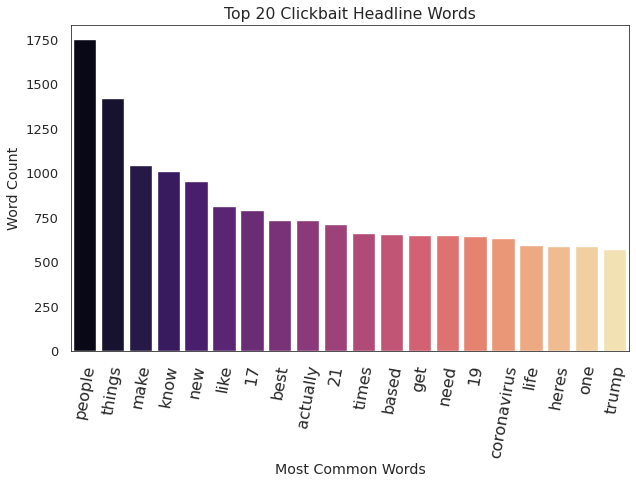

In [ ]:
#bar plot for top 15 most common clickbait words
word_freq_figure1 = plt.figure(figsize=(10,6))
sns.barplot(cb_bar_words, cb_bar_counts,palette='magma')
plt.xticks(fontsize=16)
plt.xticks(rotation=80)
plt.title('Top 20 Clickbait Headline Words')
plt.xlabel('Most Common Words')
plt.ylabel('Word Count')
sns.set_style('white')
plt.show()

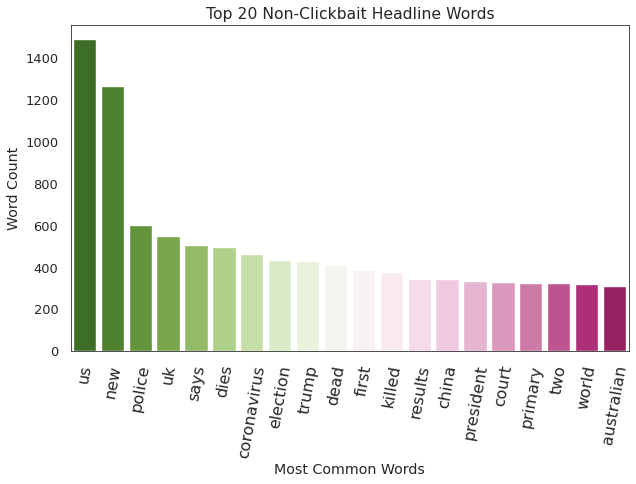

In [ ]:
#bar plot for top 15 most common non-clickbait words
word_freq_figure1 = plt.figure(figsize=(10,6))
sns.barplot(noncb_bar_words, noncb_bar_counts,palette='PiYG_r')
plt.xticks(fontsize=16)
plt.xticks(rotation=80)
plt.title('Top 20 Non-Clickbait Headline Words')
plt.xlabel('Most Common Words')
plt.ylabel('Word Count')
sns.set_style()
plt.show()

In [ ]:
# Getting data into a dictionary
# FORMAT:  dictionary = dict(zip(keys, values))
#!pip install wordcloud
from wordcloud import WordCloud
clickbait_dictionary = dict(zip(cb_bar_words, cb_bar_counts))
nonclickbait_dictionary = dict(zip(noncb_bar_words, noncb_bar_counts))

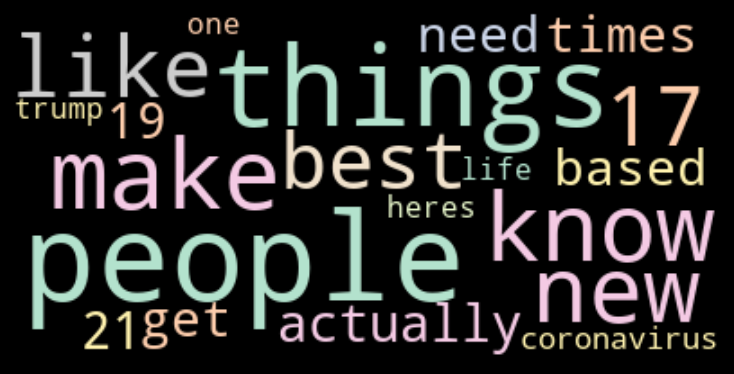

In [ ]:
# Create the clickbait word cloud:

wordcloud = WordCloud(colormap='Pastel2').generate_from_frequencies(clickbait_dictionary)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:

plt.savefig('clickbait_wc')

plt.show()

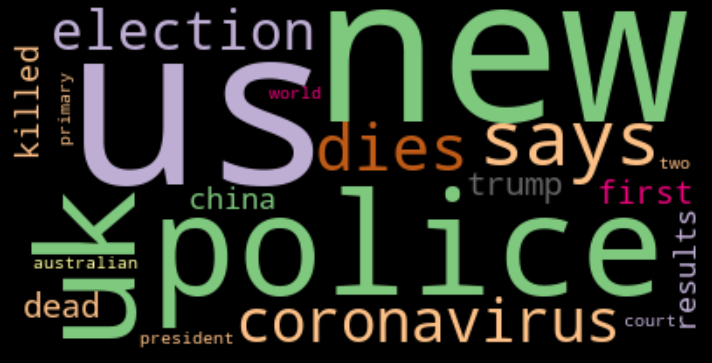

In [ ]:
# Create the non-clickbait word cloud:

wordcloud = WordCloud(colormap='Accent').generate_from_frequencies(nonclickbait_dictionary)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
plt.tight_layout()
plt.savefig('clickbait_wc')

plt.show()

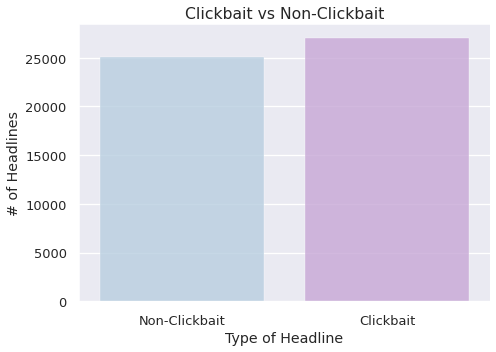

In [ ]:
#class variable countplot
#visualizing class frequency of dataset
sns.set_style('darkgrid')
plt.figure(figsize=(7,5))
fig1=sns.countplot(df['class'], alpha =.80, palette= ['#B1CFE7','#CA9FDE'])
plt.title('Clickbait vs Non-Clickbait')
plt.ylabel('# of Headlines')
plt.xlabel('Type of Headline')
fig1.set(xticklabels=['Non-Clickbait','Clickbait'])
plt.tight_layout()
plt.savefig('class_dist')
plt.show()

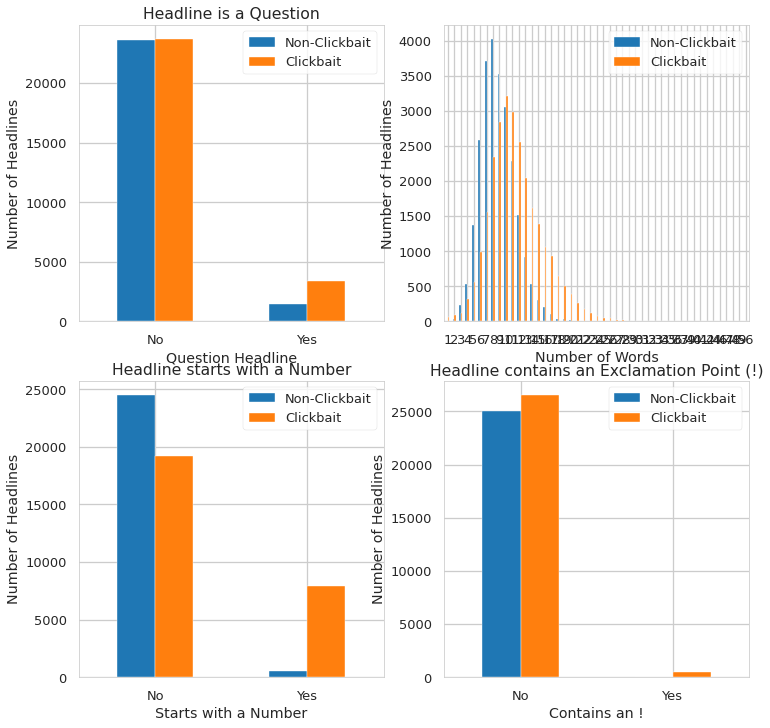

In [ ]:
#plotting engineered features to compare by class 
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

plot = df.groupby('question')['class'].value_counts().unstack().plot.bar(ax=axes[0,0], rot=0)
plot.set_xlabel('Question Headline')
plot.set_ylabel('Number of Headlines')
plot.legend(title=None,labels=['Non-Clickbait','Clickbait'])
plot.set(xticklabels=['No','Yes'])
plot.set_title('Headline is a Question')

plot = df.groupby('headline_words')['class'].value_counts().unstack().plot.bar(ax=axes[0,1], rot=0)
plot.set_xlabel('Number of Words')
plot.set_ylabel('Number of Headlines')
plot.legend(title=None,labels=['Non-Clickbait','Clickbait'])


plot = df.groupby('starts_with_num')['class'].value_counts().unstack().plot.bar(ax=axes[1,0], rot=0)
plot.set_xlabel('Starts with a Number')
plot.set_ylabel('Number of Headlines')
plot.legend(title=None,labels=['Non-Clickbait','Clickbait'])
plot.set(xticklabels=['No','Yes'])
plot.set_title('Headline starts with a Number')

plot = df.groupby('exclamation')['class'].value_counts().unstack().plot.bar(ax=axes[1,1], rot=0)
plot.set_xlabel('Contains an !')
plot.set_ylabel('Number of Headlines')
plot.legend(title=None,labels=['Non-Clickbait','Clickbait'])
plot.set(xticklabels=['No','Yes'])
plot.set_title('Headline contains an Exclamation Point (!)')

style.use('fivethirtyeight')
plt.show()

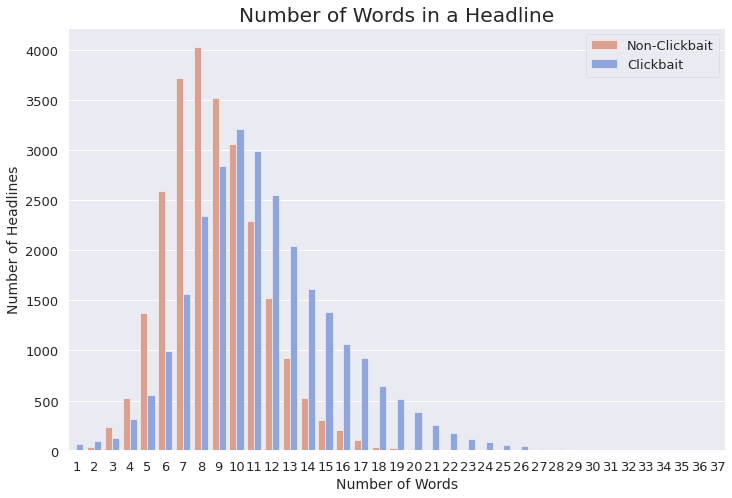

In [ ]:
#replotting headline word comparison plot with smaller range

df_words = df[df['headline_words'] < 38]

sns.countplot(df_words['headline_words'],hue=df_words['class'],palette=['#E79A84','#849FE7'],data=df_words)
sns.set_style('darkgrid')
plt.xlabel('Number of Words',size=14)
plt.ylabel('Number of Headlines', size=14)
plt.legend(title=None,labels=['Non-Clickbait','Clickbait'],loc='upper right')
plt.title('Number of Words in a Headline')
plt.tight_layout()
plt.savefig('num_words_comparison')

plt.show()

In [ ]:
df['class'].value_counts()

1    27070
0    25057
Name: class, dtype: int64

#MODELING

In [ ]:
df.shape

(52127, 6)

In [ ]:
#Create stopwords list

stopwords_list = stopwords.words('english')

features = df.drop(columns='class')
y = df['class']

#classes are mostly balanced
y.value_counts(normalize=True)

1    0.519309
0    0.480691
Name: class, dtype: float64

#Setting up for modeling
- applying TFIDF transformation to headline text
- train/test split
- creating function for results

In [ ]:
#first splitting data for test/train sets 
#ngram range -> unigrams and bigrams 

X_train, X_test, y_train, y_test = train_test_split(features, y, random_state=20)

tfidf = TfidfVectorizer(stop_words = stopwords_list,ngram_range = (1,2))
tfidf_text_train = tfidf.fit_transform(X_train['text'])
tfidf_text_test = tfidf.transform(X_test['text'])

X_train_ef = X_train.drop(columns='text')
X_test_ef = X_test.drop(columns='text')

In [ ]:
#combine tf-idf vectors with the engineered features and store as sparse arrays
from scipy import sparse

X_train = sparse.hstack([X_train_ef, tfidf_text_train]).tocsr()
X_test = sparse.hstack([X_test_ef, tfidf_text_test]).tocsr()

In [ ]:
X_train_ef

,question,exclamation,starts_with_num,headline_words
19538,0,0,0,16
28029,0,0,0,10
3376,0,0,0,16
33958,0,0,0,9
48840,0,0,0,10
...,...,...,...,...
23497,1,0,0,8
23820,0,0,1,12
37180,0,0,0,14
27143,1,0,0,11


In [ ]:
X_test.shape

(13032, 203136)

In [ ]:
#creating a function to call after each model iteration to print accuracy and recall scores for test and train
def train_results(preds):
    return "Training Accuracy:", accuracy_score(y_train,preds)," Training Recall:", recall_score(y_train,preds)

def test_results(preds):
    return "Testing Accuracy:", accuracy_score(y_test,preds)," Testing Recall:", recall_score(y_test,preds)

##Dummy Classifier

In [ ]:
#baseline model to predict majority class
import numpy as np
from sklearn.dummy import DummyClassifier
from sklearn.metrics import recall_score
dc_classifier = DummyClassifier(strategy='most_frequent')

dc_classifier.fit(X_train, y_train)

dc_train_preds = dc_classifier.predict(X_train)
dc_test_preds = dc_classifier.predict(X_test)

print(train_results(dc_train_preds))
print(test_results(dc_test_preds))

('Training Accuracy:', 0.5179946284691137, ' Training Recall:', 1.0)
('Testing Accuracy:', 0.5232504604051565, ' Testing Recall:', 1.0)


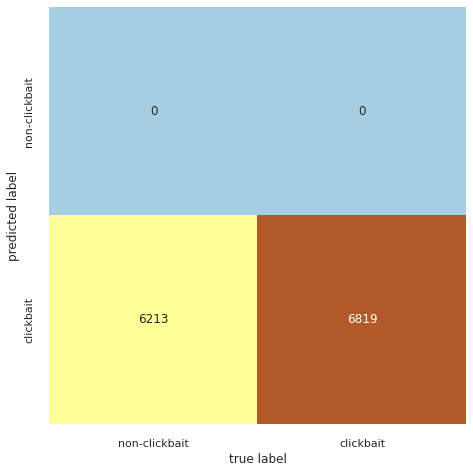

In [ ]:
#confusion matrix on test set Dummy Classifier
sns.set()

cm_dc = confusion_matrix(y_test, dc_test_preds)
sns.heatmap(cm_dc.T, square=True, annot=True, fmt='d', cbar=False,cmap="Paired", xticklabels=['non-clickbait','clickbait'],yticklabels=['non-clickbait','clickbait']
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

## Naive Bayes

In [ ]:
nb_classifier = MultinomialNB(alpha = .05)

nb_classifier.fit(X_train, y_train)

nb_train_preds = nb_classifier.predict(X_train)
nb_test_preds = nb_classifier.predict(X_test)

print(train_results(nb_train_preds))
print(test_results(nb_test_preds))

('Training Accuracy:', 0.9986699066376774, ' Training Recall:', 0.9992099155597255)
('Testing Accuracy:', 0.9300184162062615, ' Testing Recall:', 0.9416336706261915)


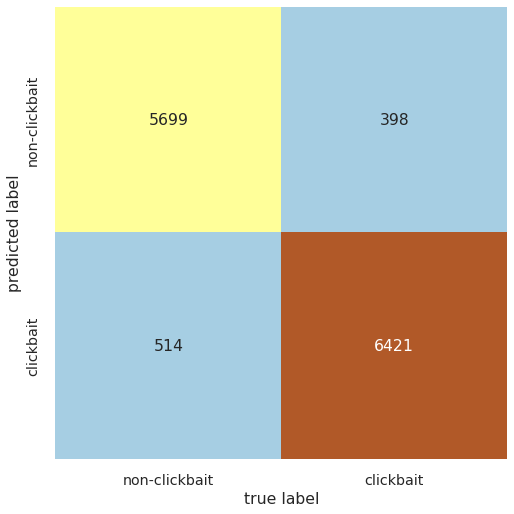

In [ ]:
#confusion matrix on test set NB Classifier
sns.set()

cm_dc = confusion_matrix(y_test, nb_test_preds)
sns.set(font_scale=1.3)
sns.heatmap(cm_dc.T, square=True, annot=True, fmt='d', cbar=False,cmap="Paired", xticklabels=['non-clickbait','clickbait'],yticklabels=['non-clickbait','clickbait']
            )
plt.tight_layout()
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig('nbcm5')
plt.show();

## Random Forest Classifier

In [ ]:
#rf_classifier = RandomForestClassifier(class_weight = 'balanced', n_estimators = 900 )
rf_classifier = RandomForestClassifier(class_weight = 'balanced' )
rf_classifier.fit(X_train, y_train)

rf_test_preds = rf_classifier.predict(X_test)
rf_train_preds = rf_classifier.predict(X_train)

print(train_results(rf_train_preds))
print(test_results(rf_test_preds))

('Training Accuracy:', 1.0, ' Training Recall:', 1.0)
('Testing Accuracy:', 0.9060773480662984, ' Testing Recall:', 0.933274673705822)


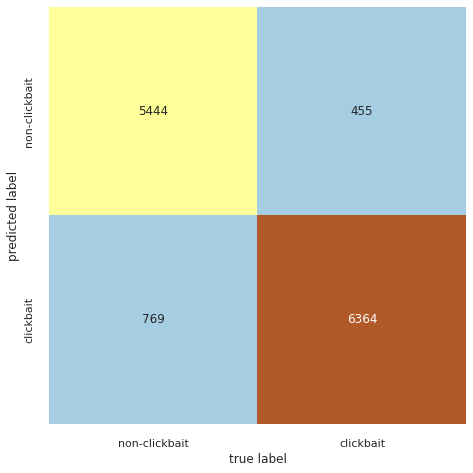

In [ ]:
#confusion matrix on test set RFC Classifier (no grid search)
sns.set()

cm_dc = confusion_matrix(y_test, rf_test_preds)
sns.heatmap(cm_dc.T, square=True, annot=True, fmt='d', cbar=False,cmap="Paired", xticklabels=['non-clickbait','clickbait'],yticklabels=['non-clickbait','clickbait']
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
#RFC is slightly overfitting, re-running with Gridsearch 
from sklearn.model_selection import GridSearchCV

rfc_grid = RandomForestClassifier(class_weight='balanced')

param_grid_rfc={
    'max_depth': [200,300],
    'n_estimators': [800,900],
}

# **SVM**

('Training Accuracy:', 0.999872106407469, ' Training Recall:', 0.9997530986124142)
('Testing Accuracy:', 0.9323204419889503, ' Testing Recall:', 0.9260888693356797)


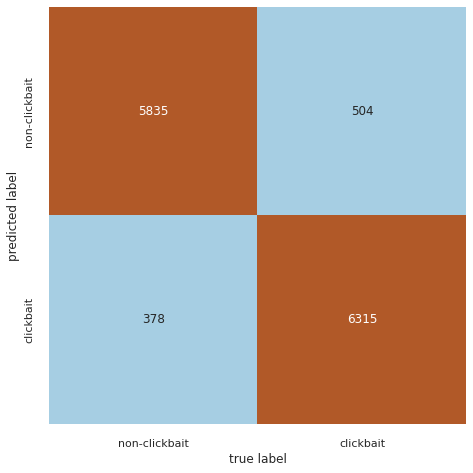

In [ ]:
#SVM Model
#svm_classifier = svm.SVC(kernel = 'linear', decision_function_shape='ovo')
from sklearn.svm import LinearSVC
svm_classifier = LinearSVC(class_weight='balanced', C=10, max_iter = 1500 )

svm_classifier.fit(X_train, y_train)

svm_test_preds = svm_classifier.predict(X_test)
svm_train_preds = svm_classifier.predict(X_train)

print(train_results(svm_train_preds))
print(test_results(svm_test_preds))

#confusion matrix on test set SVM Classifier 
sns.set()

cm_dc = confusion_matrix(y_test, svm_test_preds)
sns.heatmap(cm_dc.T, square=True, annot=True, fmt='d', cbar=False,cmap="Paired", xticklabels=['non-clickbait','clickbait'],yticklabels=['non-clickbait','clickbait']
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

## **Logistic Regression**

('Training Accuracy:', 0.999872106407469, ' Training Recall:', 0.9997530986124142)
('Testing Accuracy:', 0.9310159607120934, ' Testing Recall:', 0.924769027716674)


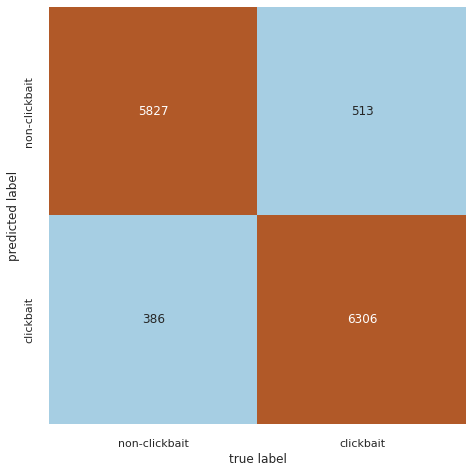

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=500, class_weight = 'balanced', solver = 'liblinear', tol=0.0001)

lr.fit(X_train,y_train)

lr_train_preds = lr.predict(X_train)
lr_test_preds = lr.predict(X_test)

print(train_results(lr_train_preds))
print(test_results(lr_test_preds))

#confusion matrix on test set lr Classifier 
sns.set()

cm_dc = confusion_matrix(y_test, lr_test_preds)
sns.heatmap(cm_dc.T, square=True, annot=True, fmt='d', cbar=False,cmap="Paired", xticklabels=['non-clickbait','clickbait'],yticklabels=['non-clickbait','clickbait']
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

# **XGB Boost**

('Testing Accuracy:', 0.8086249232658073, ' Testing Recall:', 0.8017304590115852)
('Training Accuracy:', 0.8190561452871211, ' Training Recall:', 0.8073675374055602)


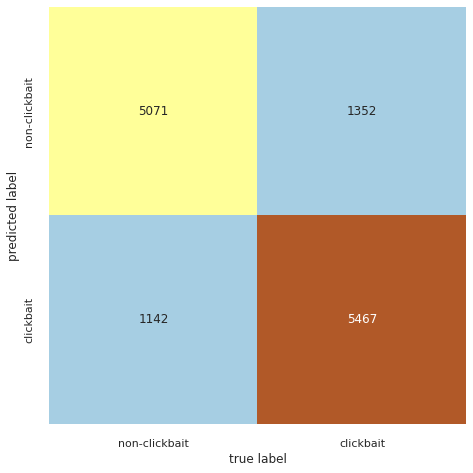

In [ ]:

from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
xgb_test_preds = xgb_clf.predict(X_test)
xgb_train_preds = xgb_clf.predict(X_train)

#print(train_results(lr_train_preds))
print(test_results(xgb_test_preds))
print(train_results(xgb_train_preds))
#confusion matrix on test set xgboost Classifier 
sns.set()

cm_dc = confusion_matrix(y_test, xgb_test_preds)
sns.heatmap(cm_dc.T, square=True, annot=True, fmt='d', cbar=False,cmap="Paired", xticklabels=['non-clickbait','clickbait'],yticklabels=['non-clickbait','clickbait']
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

# Model Interpretations and takeaway

In [ ]:
#NB coefficients
#creating dataframe for NB coefficients to evaluate the highest/lowest coefficients
coef_nb_2 = pd.DataFrame(nb_classifier.coef_)
#coef_svm.sort_values(by=0,ascending=False).head(20)
coef_df_nb=coef_nb_2.T

In [ ]:
#creating column for feat names
#run cells below first
coef_df_nb['tokens'] = all_feat_names_2

In [ ]:
nb_classifier.coef_[0]

array([ -4.85421498,  -6.82571707,  -3.99700457, ..., -15.68237801,
       -15.68237801, -15.68237801])

In [ ]:
#creating EF name list
engf_name_list=list(X_train_ef.columns)

In [ ]:
engf_name_list

['question', 'exclamation', 'starts_with_num', 'headline_words']

In [ ]:
len(tfidf.get_feature_names())

203132

In [ ]:
#creating all feature names list with engineered features and tfidf names
all_feat_names_2 = []

In [ ]:
for i in engf_name_list:
    all_feat_names_2.append(i)

In [ ]:
for i in tfidf.get_feature_names():
    all_feat_names_2.append(i)

In [ ]:
len(all_feat_names_2)

203136

In [ ]:
coef_df_nb.set_index('tokens',inplace=True)
coef_df_nb.columns

Index([0], dtype='object')

In [ ]:
coef_df_nb.sort_values(by=0,ascending=False).head(15)

,0
tokens,
headline_words,-0.321857
starts_with_num,-3.997005
question,-4.854215
exclamation,-6.825717
people,-7.553511
things,-7.576594
know,-7.775201
make,-7.937052
17,-8.061002


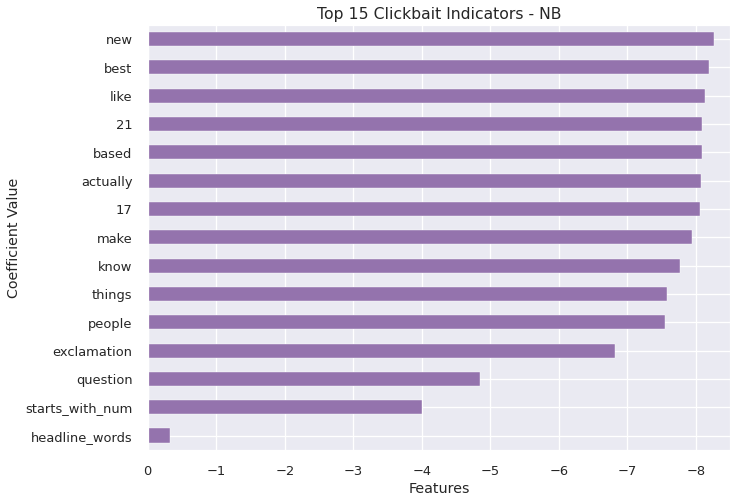

In [ ]:
#negative coefficients for non-clickbait
plt.style.use('seaborn-talk')

coef_df_nb[0].sort_values(ascending=False).head(15).plot(kind='barh',color='#9473AD')
plt.title("Top 15 Clickbait Indicators - NB")
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xlim(0, -8.5)
plt.tight_layout()
plt.savefig('CB_coefs_nb')
plt.show()

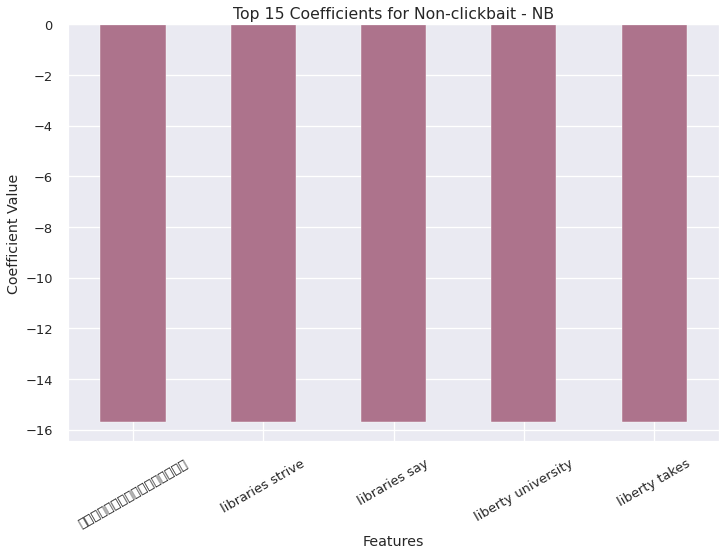

In [ ]:
plt.style.use('seaborn-talk')
coef_df_nb[0].sort_values(ascending=True).head().plot(kind='bar',color='#AD738C')
plt.title("Top 15 Coefficients for Non-clickbait - NB")
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=30)
plt.show()

# **SVM Coefficients**

In [ ]:
#SVM interpretations 
#svm coefficients
#creating dataframe for SVM coefficients to evaluate the highest coefficients
coef_svm = pd.DataFrame(svm_classifier.coef_)
#coef_svm.sort_values(by=0,ascending=False).head(20)
coef_df_svm = coef_svm.T

In [ ]:
coef_df_svm['tokens'] = all_feat_names_2

In [ ]:
coef_df_svm.set_index('tokens',inplace=True)

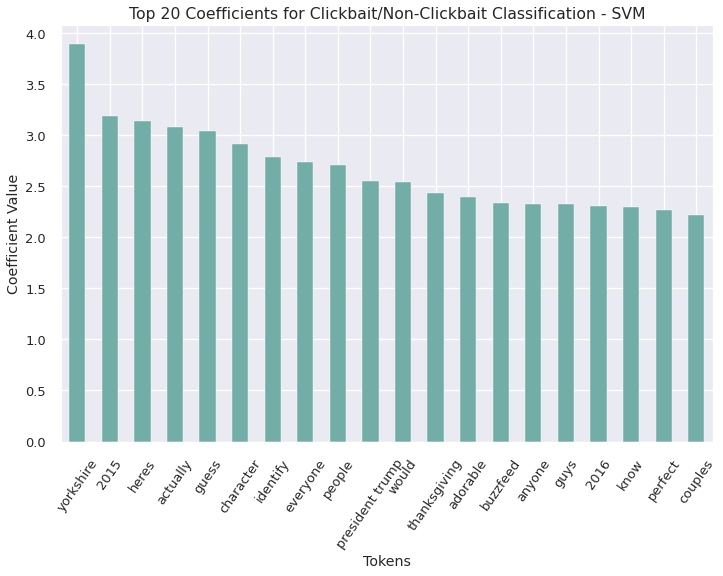

In [ ]:
coef_df_svm[0].sort_values(ascending=False).head(20).plot(kind='bar',color='#73ADA7')
plt.title("Top 20 Coefficients for Clickbait/Non-Clickbait Classification - SVM")
plt.xlabel('Tokens')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=55)
plt.show()

# **Logistic Regression coefficients**

In [ ]:
lr.coef_
#svm coefficients
#creating dataframe for SVM coefficients to evaluate the highest coefficients
coef_lr = pd.DataFrame(lr.coef_)
#coef_svm.sort_values(by=0,ascending=False).head(20)
coef_df_lr=coef_lr.T

In [ ]:
coef_df_lr['tokens']=all_feat_names_2

In [ ]:
coef_df_lr

,0,tokens
0,1.447085,question
1,6.271183,exclamation
2,4.357760,starts_with_num
3,0.461462,headline_words
4,-0.296892,00
...,...,...
203131,-0.721319,özil
203132,-0.721319,özil omission
203133,-0.310933,śrī
203134,-0.310933,śrī satya


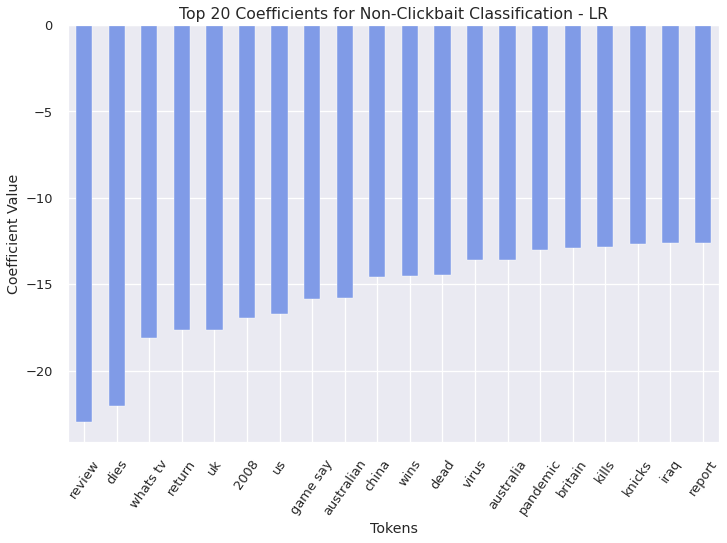

In [ ]:
coef_df_lr.set_index('tokens',inplace=True)
coef_df_lr[0].sort_values(ascending=True).head(20).plot(kind='bar' ,color='#809BE7')
plt.title("Top 20 Coefficients for Non-Clickbait Classification - LR")
plt.xlabel('Tokens')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=55)
plt.show()

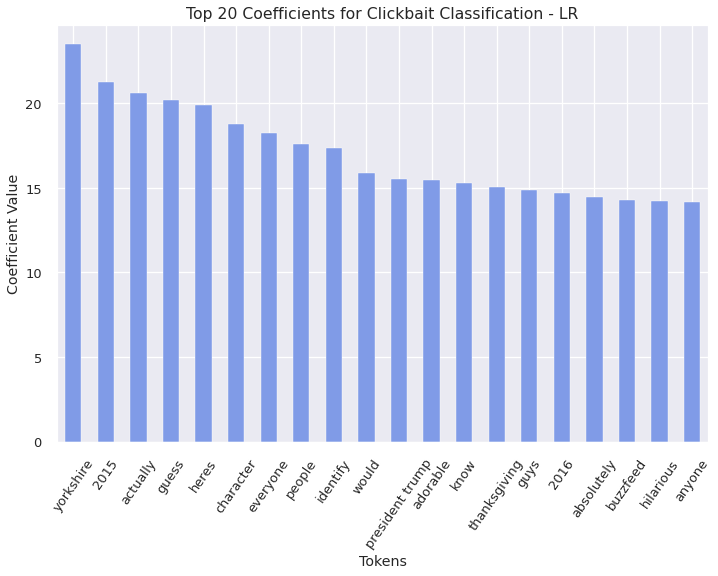

In [ ]:
coef_df_lr[0].sort_values(ascending=False).head(20).plot(kind='bar', color = '#809BE7')
plt.title("Top 20 Coefficients for Clickbait Classification - LR")
plt.xlabel('Tokens')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=55)
plt.show()

#Pickle the Model

In [ ]:
import pandas as pd
import pickle
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [ ]:
pickle.dump(coef_df_svm, open('coef_df_svm.pkl', 'wb'))

###**Conclusion:**

As seen in all the above results, these keywords help us categorize the headlines into clickbait and non-clickbait.